In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)

np.set_printoptions(precision=4, suppress=True)

In [73]:
dataset = pd.read_csv("./50_Startups.csv")
dataset.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


# Multiple_Linear_Regression/


**y = b0 + b1\*x1 + b2\*x2 + ... + bn\*xn**
    
    where
    bi = constants
    y = dependent variable
    x = independent variables

## Assumption of Linear Regression

1. linearity
2. homoscedasticity
3. multivariate normality
4. independence of errors
5. lack of multicollinearity

In [74]:
dataset.groupby("State").mean()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


In [75]:
X = dataset.iloc[:, 0:4].values # independent_var
Y = dataset.iloc[:, 4].values # dependent_var

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
    
label_encoder_X = LabelEncoder()
X[:, 3] = label_encoder_X.fit_transform(X[:, 3])

onehot_encoder = OneHotEncoder(categorical_features = [3])
X = onehot_encoder.fit_transform(X).toarray()


# remove the dummy variable trap

In [76]:
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set


In [77]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.2,
                                                   random_state = 0)

# Fitting multiple linear regression to the training set


In [80]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_predicted = regressor.predict(X = x_test)

# Deviation from original output

In [81]:
diff = y_test - y_predicted
sum_y_test = sum(y_test)
deviation = ((j-i)*100/sum_y_test for i, j in zip(y_test, y_predicted))
print("Deviation from test set")

for i in zip(y_test, y_predicted, diff, deviation):
    print("%.2f" %i[3], "%")


Deviation from test set
-0.02 %
-0.95 %
-1.12 %
-0.48 %
-1.02 %
0.91 %
-1.09 %
0.11 %
0.30 %
0.14 %


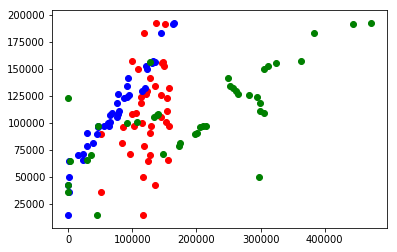

In [82]:

plt.scatter(x_train[:,3], y_train, color = "red")
plt.scatter(x_train[:,2], y_train, color = "blue")
plt.scatter(x_train[:,4], y_train, color = "green")

# Backward elimination

In [83]:
from IPython.display import IFrame 
IFrame("./14_page_p2s5_file_1_03.png", width=900, height=250)

In [86]:
import statsmodels.formula.api as sm

X_new = np.append(
            arr = np.ones((len(dataset), 1)).astype(int), 
            values = X, 
            axis = 1
            )
X_opt = X_new[:, [0, 1, 2, 3, 4, 5]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.34e-27
Time:                        12:53:42   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
# remove x1
X_opt = X_new[:, [0, 2, 3, 4, 5]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           8.50e-29
Time:                        12:53:48   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.018e+04   6747.623      7.437      0.000    3.66e+04    6.38e+04
x1          -136.5042   2801.719     -0.049      0.961   -5779.456    5506.447
x2             0.8059      0.046     17.571      0.000       0.714       0.898
x3            -0.0269      0.052     -0.521      0.605      -0.131       0.077
x4             0.0271      0.017      1.625      0.111      -0.007       0.061
==============================================================================
Omnibus:                       14.892   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.665
Skew:                          -0.949   Prob(JB):                     1.97e-05
Kurtosis:                       5.608   Cond. No.                     1.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
# remove x1
X_opt = X_new[:, [0, 3, 4, 5]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           4.53e-30
Time:                        12:53:55   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
# remove x2
X_opt = X_new[:, [0, 3, 5]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           2.16e-31
Time:                        12:54:09   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_opt, Y, 
                                                    test_size = 0.2,
                                                   random_state = 0)

In [91]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_predicted = regressor.predict(X = x_test)

In [93]:
diff = y_test - y_predicted
sum_y_test = sum(y_test)
deviation = ((j-i)*100/sum_y_test for i, j in zip(y_test, y_predicted))
print("Deviation from test set")

for i in zip(y_test, y_predicted, diff, deviation):
    print("%.2f" %i[3], "%")

Deviation from test set
-0.08 %
-0.85 %
-0.98 %
-0.34 %
-0.85 %
0.79 %
-1.05 %
-0.00 %
0.35 %
0.34 %


Text(0.5, 1.0, 'R & D Spend vs Profit')

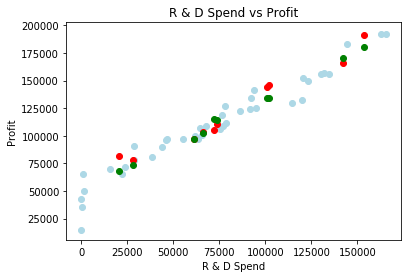

In [143]:
plt.scatter(x_train[:,1], y_train, color = "lightblue")

plt.scatter(x_test[:,1], y_test, color = "red")
plt.scatter(x_test[:,1], y_predicted, color = "green")

plt.xlabel("R & D Spend")
plt.ylabel("Profit")
plt.title("R & D Spend vs Profit")

Text(0.5, 1.0, 'Marketing spend vs Profit')

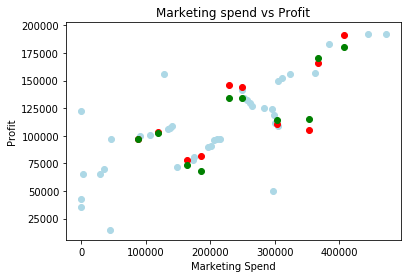

In [140]:
plt.scatter(x_train[:,2], y_train, color = "lightblue")

plt.scatter(x_test[:,2], y_test, color = "red")
plt.scatter(x_test[:,2], y_predicted, color = "green")

plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.title("Marketing spend vs Profit")